In [1]:
import pandas as pd
df_hw = pd.read_csv('housewarming2.csv')
df_prd = pd.read_csv('hou_prd_details.csv')

In [2]:
df_hw['스타일'].value_counts().head(10)

내추럴                1324
모던                  750
0                   715
미니멀&심플              230
미니멀&심플, 내추럴         230
빈티지&레트로             181
모던, 미니멀&심플          158
내추럴, 빈티지&레트로        132
유니크&믹스매치            126
모던, 미니멀&심플, 내추럴     122
Name: 스타일, dtype: int64

In [29]:
len(pd.unique(df_prd['상품url']))

100297

In [4]:
df_hw.head(5)

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,4200,5610,75,26,12,https://ohou.se/projects/126600/detail?affect_...
2,2,2022-10-07,취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,0,4214,201,60,15,https://ohou.se/projects/123056/detail?affect_...
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,5500,37375,643,169,122,https://ohou.se/projects/116945/detail?affect_...
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,9500,3760,73,13,9,https://ohou.se/projects/127436/detail?affect_...


In [5]:
df_prd = df_prd.drop('Unnamed: 0', axis = 1)
df_prd.head(5)

,id,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수
0,0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2891.0,57140.0,2113.0
1,0,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0
2,0,https://ohou.se/productions/1068049/selling,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0
3,0,https://ohou.se/productions/580038/selling,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0
4,0,https://ohou.se/productions/961600/selling,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0


In [6]:
df_prd.columns

Index(['id', '상품url', '브랜드명', '상품명', '카테고리', '상품가격', '리뷰수', '스크랩수', '스타일링샷수'], dtype='object')

In [7]:
# df1 = 분위기 별 상품 살펴보기
df_hw1 = df_hw[['id', '작성일', '제목', '가족형태', '공간', '평수구간', '스타일', '세부공사', '분야', '작업', '예산']]
df_prd1 = df_prd[['id', '브랜드명', '상품명', '카테고리', '상품가격', '리뷰수', '스크랩수', '스타일링샷수']]

In [8]:
df1 = df_prd1.merge(df_hw1, how = 'left', on = 'id')
df1

,id,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산
0,0,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2891.0,57140.0,2113.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
1,0,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
2,0,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
3,0,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
4,0,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243014,4691,아키드리머,악세스시리즈01 한정판 아트포스터,"['데코·식물', '홈갤러리', '액자']",NaN,NaN,32.0,3.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243015,4691,아키드리머,[해외]Sand Rug 01,"['패브릭', '러그·카페트', '라탄·수초러그']",NaN,NaN,26.0,8.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243016,4691,럭키보이선데이,Pale Nulle,"['데코·식물', '인테리어소품', '장식소품']",NaN,NaN,12.0,7.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243017,4691,이케아,FROSTA 스툴 3colors,"['가구', '의자', '스툴·벤치']",NaN,NaN,17597.0,1994.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0


In [9]:
df1[df1['가족형태'] == '신혼부부'].value_counts('스타일').head(11)

스타일
내추럴                35801
모던                 19463
0                  12811
미니멀&심플, 내추럴         5152
미니멀&심플              3471
모던, 미니멀&심플          2897
모던, 미니멀&심플, 내추럴     2538
빈티지&레트로             2394
모던, 내추럴             1783
내추럴, 빈티지&레트로        1764
유니크&믹스매치            1648
dtype: int64

In [10]:
df1[(df1['가족형태'] == '신혼부부') & (df1['스타일'] == '내추럴')]['상품명'].value_counts().head(20)

[최종가29.9만][1만쿠폰] 발뮤다 뉴토스터 3.0 + (9만원 상당 정품 사은품)      101
독일토분 표준형 테라코타 빈티지 화분                                  96
[최종가15.9만][1만쿠폰] 발뮤다 더 팟 전기포트 전기주전자                   65
[해외] Aesop 레저렉션 아로마틱 핸드워시 500ml 2개세트                  62
인테리어 우드액자 프레임 8종  A1 A2 A3 A4                         51
LED T5 간접조명_6colors                                   44
[해외] ★신규색상입고★프란시스 Y3.3 커피머신 + 웰컴캡슐 14개 증정             42
루씨에어 실링팬 레이더 (한국공식수입원_A/S가능)                          41
베가 폴라 투명 접이식의자 17colors(대량구매 추가할인)                    40
누적판매 19만개! 오리지널 스테디셀러! 깔끔 도마 풀세트                      36
[무료배송] 음쓰통계의 샤넬! 18-8 풀스텐 음식물쓰레기통 3L                  36
국내미출시 색상! [해외] 프란시스 Y3.3 커피머신 + 웰컴캡슐 14개              36
도무스 CMRD905 스테인리스 심플 미니멀 핀타입 방문손잡이 4colors            35
롬버스 국내생산 오리지널 마그넷 키친타올홀더 (레시피도 자석으로 착!)               34
LED 방습 다운라이트 매립등 3인치 5W 생활방수                          33
미나 LED 미니 버섯램프_LH60 12colors                          32
밀라노 1500 북선반 5colors                                  28
LED 다운라이트 3인치 7W               

In [11]:
df1[(df1['가족형태'] == '신혼부부') & (df1['스타일'] == '모던')]['상품명'].value_counts().head(20)

[최종가29.9만][1만쿠폰] 발뮤다 뉴토스터 3.0 + (9만원 상당 정품 사은품)      44
[해외] Aesop 레저렉션 아로마틱 핸드워시 500ml 2개세트                 44
LED T5 간접조명_6colors                                  42
도무스 CMRD905 스테인리스 심플 미니멀 핀타입 방문손잡이 4colors           33
[최종가15.9만][1만쿠폰] 발뮤다 더 팟 전기포트 전기주전자                  32
독일토분 표준형 테라코타 빈티지 화분                                 32
인테리어 우드액자 프레임 8종  A1 A2 A3 A4                        28
LED 방습 다운라이트 매립등 3인치 5W 생활방수                         25
LED 다운라이트 3인치 7W                                     25
삼성 비스포크 직수형 냉/온 정수기 RWP71411AAP 빌트인정수기               25
루씨에어 실링팬 레이더 (한국공식수입원_A/S가능)                         25
CCASF516 플랫 반다리 일체형 세면기                              24
[카드혜택가196만] 공식파트너 비스포크 키친핏 4도어 냉장고 RF60B91C3AP 코타    23
미나 LED 미니 버섯램프_LH60 12colors                         22
알루미늄액자 A1, A2, A3, A4,5070size 5colors               21
모노 가죽 각티슈커버 10colors                                 20
FLENSTED MOBILES 모빌 - 미래 자연 FUTURA Natura            19
[해외] ★신규색상입고★프란시스 Y3.3 커피머신 + 웰컴캡슐 14개 증정       

In [12]:
ids = []
for i in df1.index:
    if '데코·식물' in df1['카테고리'].loc[i]:
        ids.append(i)

In [13]:
df1_deco = df1.loc[ids]
df1_deco

,id,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산
2,0,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
10,0,푸른베란다,드라세나 마지나타 _이태리토분,"['데코·식물', '플라워·식물', '식물', '중대형식물']",29800.0,4.0,170.0,6.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
12,0,페페무드,돔 캔들 (3size),"['데코·식물', '캔들·디퓨저', '캔들', '캔들']",14500.0,17.0,187.0,16.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
17,0,포홈,인테리어 아치형액자 A2(420X590)_데이지,"['데코·식물', '홈갤러리', '그림·사진', '식물·꽃']",38000.0,10.0,234.0,9.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
18,0,아티파티,크림골드 컨페티 파티 풍선세트 7pcs,"['데코·식물', '파티·완구', '파티·이벤트용품', '파티풍선']",4770.0,17.0,263.0,14.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243003,4691,아키드리머,스트럭쳐시리즈 04 아트포스터,"['데코·식물', '홈갤러리', '그림·사진', '패턴']",NaN,NaN,240.0,15.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243008,4691,아키드리머,악세스시리즈 02번 한정판 아트포스터,"['데코·식물', '홈갤러리', '그림·사진', '패턴']",NaN,NaN,107.0,6.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243012,4691,아키드리머,실크스크린 아트포스터 3종 Journey Collection 01-03,"['데코·식물', '홈갤러리', '그림·사진', '패턴']",NaN,NaN,75.0,7.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243014,4691,아키드리머,악세스시리즈01 한정판 아트포스터,"['데코·식물', '홈갤러리', '액자']",NaN,NaN,32.0,3.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0


In [14]:
df1_deco_1 = df1_deco[df1_deco['스타일'] == '유니크&믹스매치']\
.groupby(['브랜드명']).nunique().sort_values(by = 'id', ascending = False)[['id']].head(20)
df1_deco_1 = df1_deco_1.rename(columns = {'id':'유니크&믹스매치'})

In [15]:
df1_deco_2 = df1_deco[df1_deco['스타일'] == '모던']\
.groupby(['브랜드명']).nunique().sort_values(by = 'id', ascending = False)[['id']].head(20)
df1_deco_2 = df1_deco_2.rename(columns = {'id':'모던'})

In [16]:
df1_deco_3 = df1_deco[df1_deco['스타일'] == '내추럴']\
.groupby(['브랜드명']).nunique().sort_values(by = 'id', ascending = False)[['id']].head(20)
df1_deco_3 = df1_deco_3.rename(columns = {'id':'내추럴'})

In [17]:
df1_deco_4 = df1_deco[df1_deco['스타일'] == '빈티지&레트로']\
.groupby(['브랜드명']).nunique().sort_values(by = 'id', ascending = False)[['id']].head(20)
df1_deco_4 = df1_deco_4.rename(columns = {'id':'빈티지&레트로'})

In [18]:
df1_deco_5 = df1_deco[df1_deco['스타일'] == '미니멀&심플']\
.groupby(['브랜드명']).nunique().sort_values(by = 'id', ascending = False)[['id']].head(20)
df1_deco_5 = df1_deco_5.rename(columns = {'id':'미니멀&심플'})

In [27]:
df1_deco_1

,유니크&믹스매치
브랜드명,
에이치홈,30
마이플랜트,29
이케아,27
메이드모드,18
류블류샵,17
꾸미까,16
플렌스테드,14
이이공브이샵,14
양키캔들,14


In [20]:
df1_deco_style = df1_deco_3.merge(df1_deco_2, on = '브랜드명').merge(df1_deco_5, on = '브랜드명').merge(df1_deco_4, on = '브랜드명').merge(df1_deco_1, on = '브랜드명')
df1_deco_style

,내추럴,모던,미니멀&심플,빈티지&레트로,유니크&믹스매치
브랜드명,,,,,
마이플랜트,373,187,19,64,29
이케아,367,186,42,49,27
메이드모드,206,94,17,24,18
꾸미까,202,104,22,35,16
멜팅스튜디오,199,85,12,36,10
에이치홈,149,70,11,30,30
아침향기,120,64,12,23,11
진심디자인,104,66,10,15,8


In [21]:
df1_deco_style.T.index

Index(['내추럴', '모던', '미니멀&심플', '빈티지&레트로', '유니크&믹스매치'], dtype='object')

In [22]:
from scipy.stats import chi2_contingency
chi2_contingency(df1_deco_style, correction=False)[1]

0.010264924559762035

In [23]:
def draw_group_barchart(df,main_category,sub_category,fig_width=14,fig_height=10, \
                        between_bar_padding=0.85,\
                        within_bar_padding=0.8, config_bar=None):
    

    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    %matplotlib inline 

 
    num_sub_category = len(sub_category) ## 서브 카테고리 개수

    fig = plt.figure(figsize=(fig_width,fig_height)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 지정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성
    
    colors = ['#EEDD7A', '#A9A5C7', '#DEA7BA', '#939297', '#875055', '#dcaaa0', '#ebf5ed', '#009fff'] ## 막대기 색상 지정
    
    tick_label = list(df.index) ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    
    tick_coord = np.arange(tick_number) ## 메인 카테고리안에서 첫번째 서브 카테고리 막대기가 그려지는 x좌표
 
    width = 1/num_sub_category*between_bar_padding ## 막대기 폭 지정
 
    config_tick = dict()
    config_tick['ticks'] = [t + width*(num_sub_category-1)/2 for t in tick_coord] ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label 
 

    plt.xticks(**config_tick) ## x축 눈금 라벨 생성

    for i in range(num_sub_category):
        if config_bar: ## 바 차트 추가 옵션이 있는 경우
            ax.bar(tick_coord+width*i, df[sub_category[i]], \
                  width*within_bar_padding, label=sub_category[i], \
                  color=colors[i], **config_bar) ## 수직 바 차트 생성
        else:
            ax.bar(tick_coord+width*i, df[sub_category[i]], \
                  width*within_bar_padding, label=sub_category[i], \
                  color=colors[i]) ## 수직 바 차트 생성
    plt.legend() ## 범례 생성
    plt.show()


main_category = df1_deco_style.columns
sub_category = df1_deco_style.index

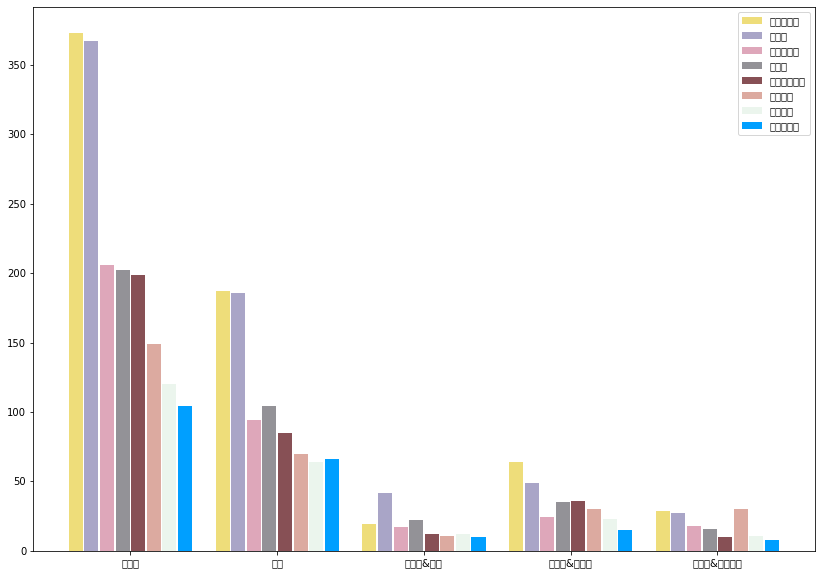

In [24]:
import warnings
warnings.filterwarnings(action='ignore')

draw_group_barchart(df1_deco_style.T,main_category,sub_category,\
                        between_bar_padding=0.85,\
                        within_bar_padding=0.9, config_bar = None)

In [31]:
df1_deco

,id,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산
2,0,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
10,0,푸른베란다,드라세나 마지나타 _이태리토분,"['데코·식물', '플라워·식물', '식물', '중대형식물']",29800.0,4.0,170.0,6.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
12,0,페페무드,돔 캔들 (3size),"['데코·식물', '캔들·디퓨저', '캔들', '캔들']",14500.0,17.0,187.0,16.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
17,0,포홈,인테리어 아치형액자 A2(420X590)_데이지,"['데코·식물', '홈갤러리', '그림·사진', '식물·꽃']",38000.0,10.0,234.0,9.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
18,0,아티파티,크림골드 컨페티 파티 풍선세트 7pcs,"['데코·식물', '파티·완구', '파티·이벤트용품', '파티풍선']",4770.0,17.0,263.0,14.0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243003,4691,아키드리머,스트럭쳐시리즈 04 아트포스터,"['데코·식물', '홈갤러리', '그림·사진', '패턴']",NaN,NaN,240.0,15.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243008,4691,아키드리머,악세스시리즈 02번 한정판 아트포스터,"['데코·식물', '홈갤러리', '그림·사진', '패턴']",NaN,NaN,107.0,6.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243012,4691,아키드리머,실크스크린 아트포스터 3종 Journey Collection 01-03,"['데코·식물', '홈갤러리', '그림·사진', '패턴']",NaN,NaN,75.0,7.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
243014,4691,아키드리머,악세스시리즈01 한정판 아트포스터,"['데코·식물', '홈갤러리', '액자']",NaN,NaN,32.0,3.0,2020-01-01,늘 취향을 곁에 두고 살아요ㅣ어느 디자이너의 런던 살이,아기가 있는 집,단독주택,25,유니크&믹스매치,0,홈스타일링,반셀프,0
